In [1]:
import numpy as np
import pandas as pd
from data_pre import data_normalize
import warnings
warnings.filterwarnings('ignore')
d = pd.read_excel(r"D:\program\pycharm\model\Data\新训练.xlsx", sheet_name='Sheet3')
data = data_normalize(d, 'WD')
df = data.fillna_by_random()
df

,WD,WLC,WLA,WIA,TD,TI,UCS,MTL,TN,ATI,TBD
0,1,1,0.000,0.000,1.360,1.290,52.64,0.200,2.00,0.6800,11.0
1,4,1,10.100,12.350,99.120,26.890,10.20,0.500,7.00,0.5500,20.0
2,3,3,8.900,10.230,63.440,18.640,32.00,1.200,15.00,0.3200,40.0
3,2,2,4.300,6.010,35.660,11.560,50.56,1.700,18.00,0.1000,350.0
4,2,1,0.000,0.000,2.360,3.570,60.25,1.400,14.00,0.1800,221.0
...,...,...,...,...,...,...,...,...,...,...,...
146,2,2,16.858,8.028,56.476,10.459,11.94,1.720,18.00,0.5600,170.0
147,4,3,7.214,3.461,65.889,25.101,21.86,1.790,7.00,0.1260,183.0
148,3,3,22.491,2.869,30.330,11.504,16.99,1.350,12.00,0.3800,353.0
149,2,4,24.662,6.223,89.944,21.963,7.29,0.613,18.00,0.1100,196.0


In [2]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
aver = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-aver)/std
X_test = (X_test-aver)/std

In [3]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [5]:
y_train, y_test = y_train - 1, y_test - 1

[0]	validation_0-mlogloss:1.52827
[1]	validation_0-mlogloss:1.45155
[2]	validation_0-mlogloss:1.39497
[3]	validation_0-mlogloss:1.33436
[4]	validation_0-mlogloss:1.27626
[5]	validation_0-mlogloss:1.22596
[6]	validation_0-mlogloss:1.18478
[7]	validation_0-mlogloss:1.13193
[8]	validation_0-mlogloss:1.09252
[9]	validation_0-mlogloss:1.06241
[10]	validation_0-mlogloss:1.02974
[11]	validation_0-mlogloss:0.99931
[12]	validation_0-mlogloss:0.98159
[13]	validation_0-mlogloss:0.96265
[14]	validation_0-mlogloss:0.94613
[15]	validation_0-mlogloss:0.92642
[16]	validation_0-mlogloss:0.90859
[17]	validation_0-mlogloss:0.89365
[18]	validation_0-mlogloss:0.89174
[19]	validation_0-mlogloss:0.88467


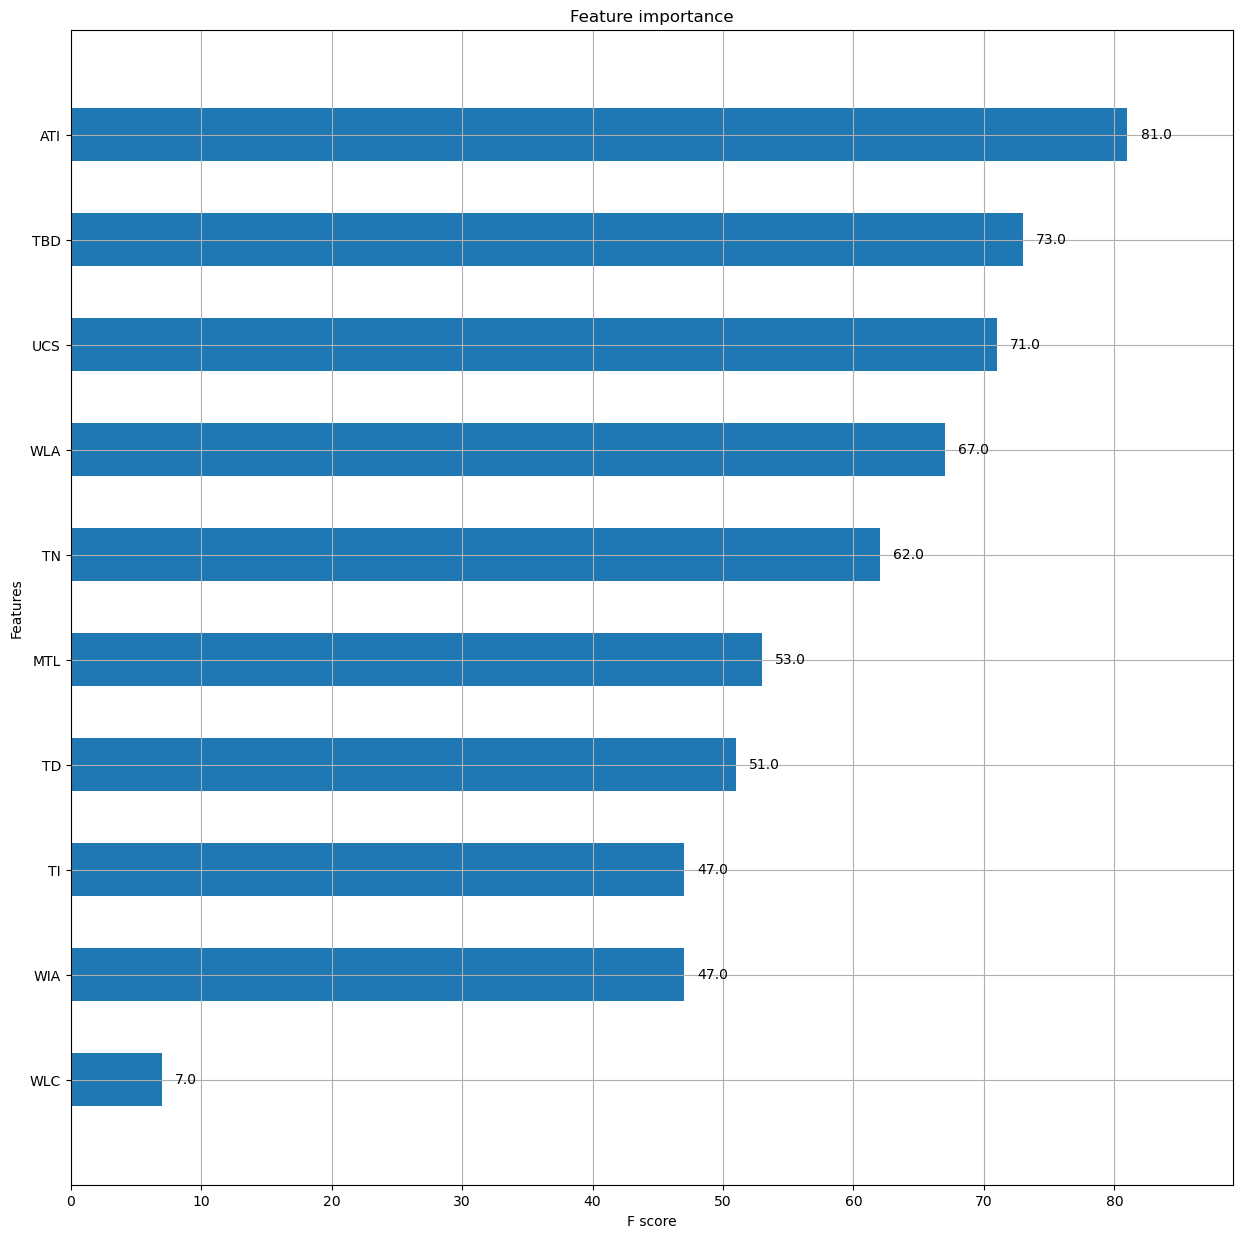

准确率: 67.74%


In [6]:
xgb_classifier = xgb.XGBClassifier(n_estimators=20,max_depth=4,learning_rate=0.1, colsample_bytree=0.8, random_state=1)
xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = True)
fig,ax = plt.subplots(figsize=(15,15))
xgb.plot_importance(xgb_classifier, height=0.5, ax=ax, max_num_features=64)
plt.show()
### 模型正确率
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("准确率: %.2f%%" % (accuracy*100.0))

In [7]:
depth = [3, 4, 5, 6, 8, 10]
for i in depth:
    xgb_classifier = xgb.XGBClassifier(n_estimators=20,max_depth=i,learning_rate=0.05, colsample_bytree=0.8, random_state=2)
    xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = False)
    y_pred = xgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("max_depth为%d时的准确率: %.2f%%" % (i, accuracy*100.0))

max_depth为3时的准确率: 61.29%
max_depth为4时的准确率: 64.52%
max_depth为5时的准确率: 67.74%
max_depth为6时的准确率: 67.74%
max_depth为8时的准确率: 67.74%
max_depth为10时的准确率: 67.74%


In [13]:
n_estimators = [20, 40, 50, 60, 80, 100]
for n in n_estimators:
    xgb_classifier = xgb.XGBClassifier(n_estimators=n, max_depth=5,learning_rate=0.01, subsample=0.8, colsample_bytree=1, random_state=19)
    xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = False)
    y_pred = xgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("n_estimators为%d时的准确率: %.2f%%" % (n, accuracy*100.0))

n_estimators为20时的准确率: 67.74%
n_estimators为40时的准确率: 67.74%
n_estimators为50时的准确率: 67.74%
n_estimators为60时的准确率: 67.74%
n_estimators为80时的准确率: 64.52%
n_estimators为100时的准确率: 64.52%


In [16]:
learning_rate = [0.01, 0.02, 0.03, 0.05, 0.1]
s = []
b = []
for i in range(20):
    b=[]
    print('第%d次训练：' % (i + 1))
    for l in learning_rate:
        xgb_classifier = xgb.XGBClassifier(n_estimators=20, max_depth=5, learning_rate=l, subsample=0.8, colsample_bytree=1, random_state=i)
        xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = False)
        y_pred = xgb_classifier.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        b.append(accuracy)
        print("learning_rate为%.3f时的准确率: %.2f%%" % (l, accuracy*100.0))
    s.append(learning_rate[np.argmax(b)])
print(s)

第1次训练：
learning_rate为0.010时的准确率: 64.52%
learning_rate为0.020时的准确率: 64.52%
learning_rate为0.030时的准确率: 61.29%
learning_rate为0.050时的准确率: 61.29%
learning_rate为0.100时的准确率: 64.52%
第2次训练：
learning_rate为0.010时的准确率: 70.97%
learning_rate为0.020时的准确率: 67.74%
learning_rate为0.030时的准确率: 64.52%
learning_rate为0.050时的准确率: 67.74%
learning_rate为0.100时的准确率: 64.52%
第3次训练：
learning_rate为0.010时的准确率: 64.52%
learning_rate为0.020时的准确率: 61.29%
learning_rate为0.030时的准确率: 61.29%
learning_rate为0.050时的准确率: 67.74%
learning_rate为0.100时的准确率: 67.74%
第4次训练：
learning_rate为0.010时的准确率: 67.74%
learning_rate为0.020时的准确率: 67.74%
learning_rate为0.030时的准确率: 67.74%
learning_rate为0.050时的准确率: 64.52%
learning_rate为0.100时的准确率: 70.97%
第5次训练：
learning_rate为0.010时的准确率: 64.52%
learning_rate为0.020时的准确率: 61.29%
learning_rate为0.030时的准确率: 61.29%
learning_rate为0.050时的准确率: 64.52%
learning_rate为0.100时的准确率: 64.52%
第6次训练：
learning_rate为0.010时的准确率: 64.52%
learning_rate为0.020时的准确率: 64.52%
learning_rate为0.030时的准确率: 64.52%
learning_rate为0.050时的准确率: 64.52%
l

In [51]:
xgb_classifier = xgb.XGBClassifier(n_estimators=20, max_depth=6, learning_rate=0.01, subsample=0.8, colsample_bytree=1,
                                   random_state=1)
xgb_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mlogloss", early_stopping_rounds=10,
                   verbose=False)
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    # clf.fit(X_train, y_train)

    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))

    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))

    # print ("\n混淆矩阵:")
    # print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(xgb_classifier, X_train, X_test, y_train, y_test)

训练集精度:
0.9666666666666667

测试集精度:
0.7096774193548387

分类识别报告:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      0.77      0.83        13
           2       0.67      0.57      0.62         7
           3       0.57      1.00      0.73         8
           4       0.00      0.00      0.00         2

    accuracy                           0.71        31
   macro avg       0.43      0.47      0.44        31
weighted avg       0.68      0.71      0.68        31


In [28]:
max_depth = 5
subsample = 0.8
params = {
    'n_estimators': 20,
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'random_state': 1
}
xgb_classifier = xgb.XGBClassifier(**params)
xgb_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mlogloss", early_stopping_rounds=10,
                   verbose=False)
print ("训练集精度:")   # 训练集精度
print (xgb_classifier.score(X_train, y_train))

print ("\n测试集精度:")    # 测试集精度
print (xgb_classifier.score(X_test, y_test))
print('=' * 25)

[20:11:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387


In [31]:
n_estimators = [10, 20, 30, 40, 50]
for n in n_estimators:
    params = {
        'n_estimators': n,
        'max_depth': 5,
        'learning_rate': 0.01,
        'subsample': 0.8,
        'colsample_bytree': 1,
        'random_state': 1
    }
    xgb_classifier = xgb.XGBClassifier(**params)
    xgb_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mlogloss", early_stopping_rounds=10,
                       verbose=False)
    
    print(n)
    print ("训练集精度:")   # 训练集精度
    print (xgb_classifier.score(X_train, y_train))
    
    print ("\n测试集精度:")    # 测试集精度
    print (xgb_classifier.score(X_test, y_test))
    print('=' * 25)

10
训练集精度:
0.9916666666666667

测试集精度:
0.6129032258064516
20
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
30
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
40
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
50
训练集精度:
0.9666666666666667

测试集精度:
0.7096774193548387


In [33]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in max_depth:
    params = {
        'n_estimators': 20,
        'max_depth': n,
        'learning_rate': 0.01,
        'subsample': 0.8,
        'colsample_bytree': 1,
        'random_state': 1
    }
    xgb_classifier = xgb.XGBClassifier(**params)
    xgb_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mlogloss", early_stopping_rounds=10,
                       verbose=False)
    
    print(n)
    print ("训练集精度:")   # 训练集精度
    print (xgb_classifier.score(X_train, y_train))
    
    print ("\n测试集精度:")    # 测试集精度
    print (xgb_classifier.score(X_test, y_test))
    print('=' * 25)

2
训练集精度:
0.7166666666666667

测试集精度:
0.5483870967741935
3
训练集精度:
0.85

测试集精度:
0.6451612903225806
4
训练集精度:
0.9166666666666666

测试集精度:
0.6451612903225806
5
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
6
训练集精度:
0.9666666666666667

测试集精度:
0.7096774193548387
7
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
8
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
9
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
10
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387


In [41]:
learning_rate = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
for n in learning_rate:
    params = {
        'n_estimators': 20,
        'max_depth': 6,
        'learning_rate': n,
        'subsample': 0.8,
        'colsample_bytree': 1,
        'random_state': 1
    }
    xgb_classifier = xgb.XGBClassifier(**params)
    xgb_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mlogloss", early_stopping_rounds=10,
                       verbose=False)
    
    print(n)
    print ("训练集精度:")   # 训练集精度
    print (xgb_classifier.score(X_train, y_train))
    
    print ("\n测试集精度:")    # 测试集精度
    print (xgb_classifier.score(X_test, y_test))
    print('=' * 25)

0.001
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
0.002
训练集精度:
0.9583333333333334

测试集精度:
0.7096774193548387
0.005
训练集精度:
0.95

测试集精度:
0.6774193548387096
0.01
训练集精度:
0.9666666666666667

测试集精度:
0.7096774193548387
0.02
训练集精度:
0.975

测试集精度:
0.7096774193548387
0.03
训练集精度:
0.9833333333333333

测试集精度:
0.6451612903225806
0.05
训练集精度:
0.9916666666666667

测试集精度:
0.7096774193548387
0.1
训练集精度:
0.9916666666666667

测试集精度:
0.6774193548387096
